In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.image as mpimg
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [17]:
import os

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "Downloads/animals"

datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  
)


train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

print(train_data.class_indices) 


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
{'cat': 0, 'dog': 1}


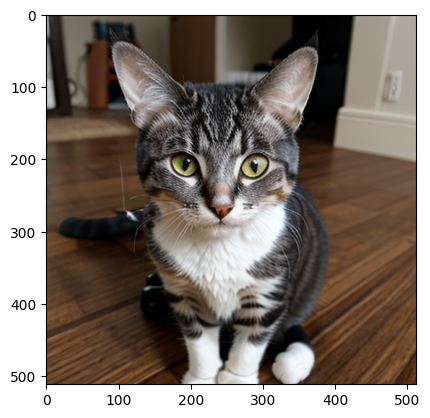

In [24]:
img=mping.imread("Downloads/animals/cat/00000-4122619873.png")
plt.imshow(img)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5247 - loss: 0.9842 - val_accuracy: 0.7750 - val_loss: 0.5382
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8127 - loss: 0.4746 - val_accuracy: 0.7850 - val_loss: 0.4549
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8254 - loss: 0.3947 - val_accuracy: 0.8150 - val_loss: 0.4133
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9130 - loss: 0.2423 - val_accuracy: 0.8250 - val_loss: 0.3610
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9333 - loss: 0.1962 - val_accuracy: 0.9150 - val_loss: 0.2716
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9846 - loss: 0.0809 - val_accuracy: 0.9050 - val_loss: 0.2370
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9912 - loss: 0.0386 - val_accuracy: 0.9250 - val_loss: 0.2526
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9984 - loss: 0.0154 - val_accuracy: 0.8700 - val_loss: 0.4294
Epo

In [30]:

val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.8629 - loss: 0.4063
Validation Accuracy: 0.88


In [31]:

test_img_path = "Downloads/animals/dog/00503-3846168665.png"
test_img = image.load_img(test_img_path, target_size=(224, 224))
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0)
test_img_array /= 255.0

prediction = model.predict(test_img_array)
print("Prediction: Dog 🐶" if prediction[0] > 0.5 else "Prediction: Cat 🐱")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction: Dog 🐶
